In [0]:
#------------------------------------------------
# Import des packages
# d'autres packages sont ajoutés au fur et à mesure
#------------------------------------------------
from contextlib import contextmanager
import os
import sys
import pandas as pd
@contextmanager
def suppress_stdout():
  with open(os.devnull, "w") as devnull:
    old_stdout = sys.stdout
    sys.stdout = devnull
    try:
        yield
    finally:
      sys.stdout = old_stdout

In [0]:
#-------------------------------------------------
# Une manière d'importer facilement le fichier Json
#-------------------------------------------------

file = open('/content/kaggle.json', 'w')
file.write('{"username":"mariejeanneschulman","key":"dcb8389023a7d3b8c706f767db7aa0e3"}')
file.close()

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle

!chmod 600 /root/.kaggle/kaggle.json
# ici le chemin sur kaggle du dataset
!kaggle datasets download -d playlist/men-women-classification

print("unzipping files...")
with suppress_stdout():
  !unzip men-women-classification.zip
print("files unzipped...")

kaggle.json
 99% 1.18G/1.19G [00:09<00:00, 145MB/s]
100% 1.19G/1.19G [00:09<00:00, 130MB/s]
unzipping files...
files unzipped...


In [0]:
import pandas as pd
#------------------------------------------------
# Phase de preprocessing 
# Préparation des données d'entrainements et de tests
#------------------------------------------------

mens = os.listdir("data/men")
print(mens)
womens = os.listdir("data/women")
print(womens)
categories = []
filenames = []

#----------------------------------------------------------------------
# Je boucle sur mes deux tableaux et j'attribue un label "men", "woman"
# ainsi qu'une categorie : 1 ou 0
#----------------------------------------------------------------------
for men in mens:
    filenames.append("men/" + men)
    categories.append(1)

for women in womens:   
        filenames.append("women/" + women)    
        categories.append(0)
#---------------------------------------------------------
# Pour que tout notre dossier soit dans un seul tableau
# je combine mes labels et catégories dans un seul dataframe
#---------------------------------------------------------
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

['00002011.jpg', '00001614.jpg', '00000609.jpg', '00000033.png', '00000833.jpg', '00000168.jpg', '00000058.jpg', '00001169.jpg', '00001632.jpg', '00001898.jpg', '00000749.jpg', '00000521.jpg', '00002139.jpg', '00001079.jpg', '00001951.jpg', '00000208.jpg', '00000166.jpg', '00000496.jpg', '00001223.jpg', '00000007.jpg', '00002016.jpg', '00001498.jpg', '00001225.jpg', '00000236.jpg', '00001332.jpg', '00001004.jpg', '00001874.jpg', '00001038.jpg', '00000992.jpg', '00002026.jpg', '00002039.jpg', 'misclassed (5).jpg', '00000554.jpg', '00000331.jpg', '00001990.jpg', '00001260.jpg', '00001037.jpg', '00000267.jpg', '00000875.jpg', '00000115.jpg', '00000823.png', '00000378.jpg', '00000346.jpg', '00001670.jpg', '00000107.jpg', '00002163.jpg', '00002317.jpg', '05 (6).jpg', '00000544.jpg', '00000073.jpg', '00000035.jpg', '00000747.jpg', '00002074.jpg', '00002078.jpg', '00002298.jpg', '00002302.jpg', '00000883.jpg', '00001048.jpg', '00001288.jpg', '00000538.jpg', '00001077.jpg', '00000806.jpg', '00

In [0]:

#------------------------------------------------
# J'affiche les 5 premiers éléments pour tester
#------------------------------------------------
df.head(5)

#---------------------------------
# J'affiche les 5 derniers éléments
#---------------------------------
df.tail()


,filename,category
3325,women/00001590.gif,0
3326,women/00000847.jpg,0
3327,women/00001091.jpg,0
3328,women/missclassed (39).jpg,0
3329,women/00000865.jpg,0


In [0]:
import random
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img
#----------------------------------------------
# Je choisi une image aléatoire et je l'affiche
#----------------------------------------------
sample = random.choice(mens)
menImage = load_img("data/men/"+ sample)
plt.imshow(menImage)

#sample2 = random.choice(womens)
#womenImage = load_img("data/women/"+sample2)
#plt.imshow(womenImage)

In [0]:
#--------------------------------------
# Mes Constants utilisés dans mon modèle
#--------------------------------------
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

#----------------------------------------------------------------------------------------------------------------------------------------------
# Mon modèle
# Comme je traite des images je vais faire appel à des convolutions qui permettent de se concentrer sur des traits distinctifs en se servant de matrices.
# On peux parler de features map car on traite des images qui gèrent la profondeur d'une image.
# Pour y arriver on fait appel à de nombreux outils:
# MaxPooling : il prend que les pixels essentiels. Elimine ceux qui ne sont pas pertinants
# Relu :(nombres positifs) Une sort de tuyau pour inclure que les valeurs positives. Les zéros sont mis à nul pour dire cela je ne le récupère pas
# Softmax :(nombre entre 0 et 1) Concerne la dernière couche
#          Ramène les valeurs entre 0 et 1 pour pouvoir créer un écart et récupérer la plus forte des neurones de sorties
# Dropout :Il traite les images avec un peu d'aléatoire/flou pour ne pas surapprendre 
#-----------------------------------------------------------------------------------------------------------------------------------------------
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2  car on deux classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

In [0]:
#---------------------------------------
# On remplace 0 par "men" et 1 par "women"
#----------------------------------------
df["category"] = df["category"].replace({0: 'men', 1: 'women'}) 

In [0]:
from sklearn.model_selection import train_test_split

#---------------------------------------------------------
# On divise notre dataframe en données d'entrainement (80%)
# et données de tests (20%) 
# On profite aussi pour enlever l'index des deux parties
#---------------------------------------------------------
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

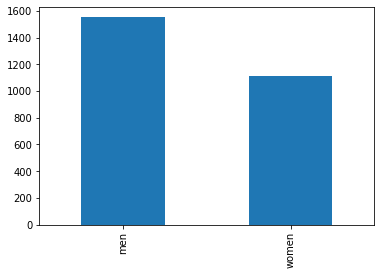

In [0]:
#-------------------------------------------------------------------------------------------------------
# J'affiche un graphique quantitatif des nombres de données grâce à matplotlib des données d'entrainement
#-------------------------------------------------------------------------------------------------------
train_df['category'].value_counts().plot.bar()

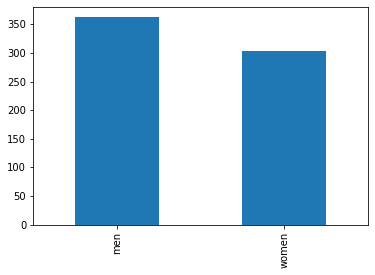

In [0]:
#------------------------------------------
# Même chose mais pour les données de tests
#------------------------------------------
validate_df['category'].value_counts().plot.bar()

In [0]:
#------------------------------------------------------------------
# Les spécificités de l'entrainement et de tests
# On cherche maintenant juste à récupérer le label ou filename
# Shape renvoit les dimensions/colonnes de la dataframe
# Shape[0] c'est le filename et shape[1] c'est les categories
#------------------------------------------------------------------
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=2

In [0]:
from keras.preprocessing.image import ImageDataGenerator, load_img

#--------------------------------------------------------------------------------------------
# Permet des transformations aléatoires pour mieux généraliser en évitant le surapprentissage 
# Ce processus s'appelle "augementer" l'image
#--------------------------------------------------------------------------------------------
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

#-----------------------------------------------------------------
# Permet d'instancier des générateurs de batchs d'images augmentées
#-----------------------------------------------------------------
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/content/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 2649 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 15 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [0]:
#------------------------------------------
# Même chose mais pour des données de tests
#------------------------------------------
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 660 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 6 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [0]:
import matplotlib.pyplot as plt
#---------------------------------------------------------------------------------------------
# Permet de générer à partir d'une seul image, plusieurs images visualisées sur plusieurs angles 
#---------------------------------------------------------------------------------------------
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in validation_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [0]:
#--------------------------------------------------------------------------------------------
# Callbacks
# Trop peu d'entrainement résultera à un sous-apprentissage des données d'entrainements et de tests.
# L'inverse c'est-à-dire un surapprenstissage résulte d'une mauvaise performance également.
# Pour trouver le juste milieu il faut faire un compromis lorsque l'apprentisage commence à se lasser 
# Pour y arriver on utilise des callbacks évoqués en bas
#--------------------------------------------------------------------------------------------

#------------------------------------------------------------------------------------
# earlyStop est utilisé pour empêcher du overfitting c'est-à-dire du surapprentissage
#------------------------------------------------------------------------------------
earlystop = EarlyStopping(patience=10)

#---------------------------------------------------------------------------------------------------------
# Cela empêche un surapprentissage aussi qui nuira à une descente ou hausse brutale de la courbe graphique
#---------------------------------------------------------------------------------------------------------
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

CALLBACKS = [earlystop, learning_rate_reduction]

epochs=3 
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    shuffle=True,
    callbacks = CALLBACKS
)

Epoch 1/3
1332/1332 [==============================] - 441s 331ms/step - loss: 0.8368 - accuracy: 0.5167 - val_loss: 0.7373 - val_accuracy: 0.5270
Epoch 2/3
1332/1332 [==============================] - 442s 332ms/step - loss: 0.8054 - accuracy: 0.5190 - val_loss: 0.5523 - val_accuracy: 0.5465
Epoch 3/3
1332/1332 [==============================] - 444s 333ms/step - loss: 0.7853 - accuracy: 0.5291 - val_loss: 0.6116 - val_accuracy: 0.5165


In [0]:
model.save_weights("model.h5")

In [0]:
import numpy as np

#-----------------------------------------------------------
# Obtient une liste de listes de résultats sur les données 
# d'entrainement et de tests par époches
#-----------------------------------------------------------
acc = history.history['accuracy']
val_acc = history.history[ 'val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # retourne nombre d'époches

#--------------------------------------------------
# Entrainement de précision de validation par époches
#--------------------------------------------------
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Entrainement de perte de validation par époches
#------------------------------------------------
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [0]:
#---------------------------------
# Préparation des données de tests
#---------------------------------
test_filenames = os.listdir("/content/")
test_df = pd.DataFrame({
    'filename': filenames
})
nb_samples = test_df.shape[0]
#print(nb_samples)

In [0]:
#-----------------------------------------------
# Transformation aléatoire pour mieux généraliser 
#-----------------------------------------------
test_gen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)

#----------------------------------------------------------------
# Instancie des générateurs d'images augmentés à partir du test_gen
#----------------------------------------------------------------
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/content/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 3309 validated image filenames.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 21 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [0]:
#------------------------------------------------------------------------------------------------------------------------------------------------------
# Le predict_generator permet de générer une prédiction de catégorie en fonction du test_generator qui lui ne contient que les labels.
# L'arrêt de cette prédiction c'est en fonction du "steps" qui lui contient nb_samples qui renvoit à la première colonnes CAD les labels (test_df.shape[0])
# nb_samples est ensuite divisé par le batch_size qui concerne le nombre d'examples à traiter complètement avant la fin de la boucle.  
#------------------------------------------------------------------------------------------------------------------------------------------------------
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))


In [0]:
print(predict)

[[0.54711145 0.45288855]
 [0.38938805 0.61061186]
 [0.32959905 0.6704009 ]
 ...
 [0.31599462 0.6840054 ]
 [0.7850733  0.2149267 ]
 [0.48216635 0.51783365]]


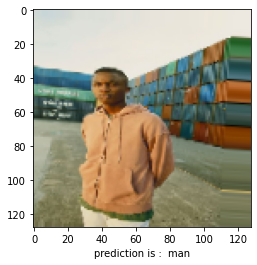

In [0]:
#---------------------------------------------------------------------------------
# Affichage en mode graphique d'une photo avec en bas une prédiction homme ou femme
#---------------------------------------------------------------------------------

for i in range(20):
  # Pourcentage maximal d'un prediction
  pred_category = predict[i].argmax()
  # En fonction de ma prédiction j'attribut mes labels
  if pred_category == 0:
    label = 'woman'
  else:
    label = 'man'
#--------------------------------------------------------------------------------
# J'affiche une image à partir de mon test_generator(qui génère une image augmentée)
#---------------------------------------------------------------------------------
for X_batch in test_generator:
  image = X_batch[0]
  plt.imshow(image)
  break
# J'affiche en bas de l'image mon label
plt.xlabel('prediction is :  ' + label)
plt.show()